In [22]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

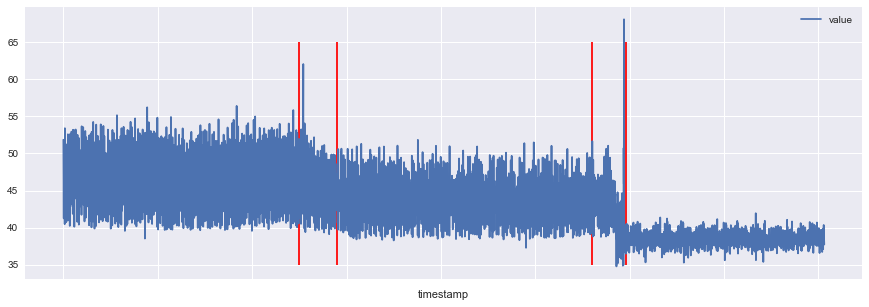

In [166]:
df = pd.read_csv("./realAWSCloudwatch/ec2_cpu_utilization_5f5533.csv")
df.set_index("timestamp", inplace = True)
ax = df.plot(figsize = (15,5))
plt.vlines(1250, 35, 65,'red')
plt.vlines(1450, 35, 65,'red')
plt.vlines(2800, 35, 65,'red')
plt.vlines(2980, 35, 65,'red')

In [149]:
import scipy.stats as stats
window = 0.1
ps = []
for i in range(90):
    start = i*0.01
    end = i*0.01 + window
    a = list(df.iloc[int(start*len(df)):int(end*len(df))].values.reshape(-1))
    b = (a - np.mean(a))/np.std(a)
    res = stats.kstest(b,'norm')
    ps.append(res.pvalue)

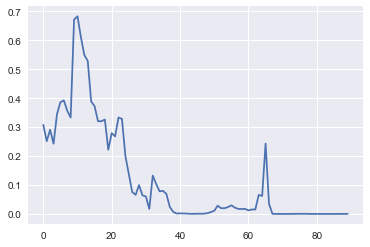

In [150]:
plt.plot(ps)

## Analysis
in real data, anomaly may happen as changing of distribution, both in distribution parameter and even distribution itself.
As plotted above, we can cut the real data into 5 part. As we can see, there are steady distribution within part 1,3,5 and changing process happen in part 2 and 4. However, only the first part data is normally dsitributed. As we plot pvalue of hypothesising data samples with a time window (0.1 times the whole period in this practice) is normally dsitributed, while the window sliding from the beginning until the end.

For each part we describe the statistics of the part

In [167]:
df.iloc[:1250].describe()

,value
count,1250.000000
mean,46.450659
std,3.738123
min,38.522000
25%,43.756000
50%,46.174000
75%,49.108000
max,56.408000


In [169]:
df.iloc[1250:1450].describe()

,value
count,200.000000
mean,45.188422
std,3.586517
min,39.112000
25%,42.728500
50%,44.655000
75%,47.130000
max,62.056000


In [170]:
df.iloc[1450:2800].describe()

,value
count,1350.000000
mean,43.543393
std,2.880532
min,37.276000
25%,41.666000
50%,43.244000
75%,45.182000
max,51.830000


In [171]:
df.iloc[2800:2980].describe()

,value
count,180.000000
mean,42.591889
std,3.924246
min,34.766000
25%,39.758000
50%,42.869000
75%,44.536000
max,68.092000


In [172]:
df.iloc[2980:].describe()

,value
count,1052.000000
mean,38.279363
std,0.989915
min,35.278000
25%,37.700000
50%,38.076000
75%,38.780000
max,41.936000
